In [1]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customerdata=pd.read_json('customersdata.json',lines=True)
customerdata.head()

,customer,fraudulent,orders,paymentMethods,transactions
0,"{'customerEmail': 'josephhoward@yahoo.com', 'c...",False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...",True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,"{'customerEmail': 'andersonwilliam@yahoo.com',...",False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...",False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,"{'customerEmail': 'uchen@malone.com', 'custome...",True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


In [3]:
customers = []
orders = []
paymentMethods = []
transactions = []
raw_json=[]
with open('customersdata.json') as f:
    for line in f:
        raw_json.append(json.loads(line))
#with open('customersdata.json') as f:
#    raw_json = json.load(f)

customer_id = 0
for i in raw_json:
    customers.append([
        customer_id,
        i['fraudulent'],
        i['customer']['customerEmail'],
        i['customer']['customerPhone'],
        i['customer']['customerDevice'],
        i['customer']['customerIPAddress'],
        i['customer']['customerBillingAddress'],
    ])

    for j in i['orders']:
        orders.append([
            customer_id,
            j['orderId'],
            j['orderAmount'],
            j['orderState'],
            j['orderShippingAddress'],
        ])
    for k in i['paymentMethods']:
        paymentMethods.append([
            customer_id,
            k['paymentMethodId'],
            k['paymentMethodRegistrationFailure'],
            k['paymentMethodType'],
            k['paymentMethodProvider'],
            k['paymentMethodIssuer'],
        ])
    for l in i['transactions']:
        transactions.append([
            customer_id,
            l['transactionId'],
            l['orderId'],
            l['paymentMethodId'],
            l['transactionAmount'],
            l['transactionFailed'],
        ])
    
    customer_id += 1



customers_df = pd.DataFrame(data=customers, columns=['customer_id', 'fraudulent', 'customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress'])

orders_df = pd.DataFrame(data=orders, columns=['customer_id', 'orderId', 'orderAmount','orderState','orderShippingAddress'])

paymentMethods_df=pd.DataFrame(data=paymentMethods,columns=['customer_id','paymentMethodId','paymentMethodRegistrationFailure','paymentMethodType','paymentMethodProvider','paymentMethodIssuer'])

transactions_df=pd.DataFrame(data=transactions,columns=['customer_id','transactionId','orderId','paymentMethodId','transactionAmount','transactionFailed'])

In [4]:
customers_df.head()

,customer_id,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,2,False,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,3,False,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,4,True,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


In [5]:
paymentMethods_df.head()

,customer_id,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,0,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,1,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,1,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,1,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,1,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


In [6]:
transactions_df.head()

,customer_id,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed
0,0,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,0,y4wcv03i,yp6x27,wt07xm68b,26,False
2,1,5mi94sfw,nlghpa,41ug157xz,45,False
3,1,br8ba1nu,uw0eeb,41ug157xz,23,False
4,1,a33145ss,bn44oh,y3xp697jx,43,True


In [7]:
orders_df.head()

,customer_id,orderId,orderAmount,orderState,orderShippingAddress
0,0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,0,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,1,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,1,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,1,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [9]:
df_customer = pd.merge(left=customers_df,right=orders_df,on='customer_id')
df_customer.head()

,customer_id,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [10]:
df_transaction = pd.merge(left=df_customer,right=transactions_df,on='orderId')
df_transaction.head()

,customer_id_x,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,customer_id_y,transactionId,paymentMethodId,transactionAmount,transactionFailed
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",0,a9lcj51r,wt07xm68b,18,False
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",0,y4wcv03i,wt07xm68b,26,False
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",1,5mi94sfw,41ug157xz,45,False
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,1,br8ba1nu,41ug157xz,23,False
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",1,a33145ss,y3xp697jx,43,True


In [11]:
df_final = pd.merge(left=df_transaction,right=paymentMethods_df,on='paymentMethodId')
df_final.head()

,customer_id_x,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,...,customer_id_y,transactionId,paymentMethodId,transactionAmount,transactionFailed,customer_id,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,...,0,a9lcj51r,wt07xm68b,18,False,0,True,card,JCB 16 digit,Citizens First Banks
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,...,0,y4wcv03i,wt07xm68b,26,False,0,True,card,JCB 16 digit,Citizens First Banks
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45,fulfilled,...,1,5mi94sfw,41ug157xz,45,False,1,False,bitcoin,American Express,Bastion Banks
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23,fulfilled,...,1,br8ba1nu,41ug157xz,23,False,1,False,bitcoin,American Express,Bastion Banks
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,bn44oh,43,fulfilled,...,1,a33145ss,y3xp697jx,43,True,1,True,bitcoin,VISA 16 digit,Solace Banks


In [12]:
df_final.head()

,customer_id_x,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,...,customer_id_y,transactionId,paymentMethodId,transactionAmount,transactionFailed,customer_id,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,...,0,a9lcj51r,wt07xm68b,18,False,0,True,card,JCB 16 digit,Citizens First Banks
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,...,0,y4wcv03i,wt07xm68b,26,False,0,True,card,JCB 16 digit,Citizens First Banks
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45,fulfilled,...,1,5mi94sfw,41ug157xz,45,False,1,False,bitcoin,American Express,Bastion Banks
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23,fulfilled,...,1,br8ba1nu,41ug157xz,23,False,1,False,bitcoin,American Express,Bastion Banks
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,bn44oh,43,fulfilled,...,1,a33145ss,y3xp697jx,43,True,1,True,bitcoin,VISA 16 digit,Solace Banks


In [13]:
df_final.columns

Index(['customer_id_x', 'fraudulent', 'customerEmail', 'customerPhone',
       'customerDevice', 'customerIPAddress', 'customerBillingAddress',
       'orderId', 'orderAmount', 'orderState', 'orderShippingAddress',
       'customer_id_y', 'transactionId', 'paymentMethodId',
       'transactionAmount', 'transactionFailed', 'customer_id',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer'],
      dtype='object')

In [14]:
df_final=df_final.drop(['customer_id_y','customer_id'],axis=1)

In [15]:
df_final=df_final.rename(columns={"customer_id_x": "customer_id"})

In [16]:
##df_final.to_csv('customerdata.csv')

In [17]:
print('True Fraud :' +str(len(customers_df[customers_df['fraudulent']==True])*100/len(customers_df)))
print('False Fraud :' +str(len(customers_df[customers_df['fraudulent']==False])*100/len(customers_df)))

True Fraud :36.30952380952381
False Fraud :63.69047619047619


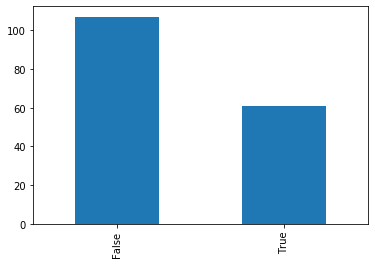

In [18]:
##No of Customer fall under Fraud 
pd.value_counts(customers_df['fraudulent']).plot.bar()
plt.show()

#### Percentage of True Fraud customer is 36%.
#### Percentage of False Fraud customer is 63%.

In [19]:
df_final.columns

Index(['customer_id', 'fraudulent', 'customerEmail', 'customerPhone',
       'customerDevice', 'customerIPAddress', 'customerBillingAddress',
       'orderId', 'orderAmount', 'orderState', 'orderShippingAddress',
       'transactionId', 'paymentMethodId', 'transactionAmount',
       'transactionFailed', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'paymentMethodIssuer'],
      dtype='object')

In [20]:
### No of order group by 'fraudulent'
df_final.groupby(['fraudulent']).aggregate({'orderId':len,'orderAmount':np.sum})

,orderId,orderAmount
fraudulent,,
False,366,10632
True,257,10923


In [21]:
print('No of fraud order is :- ' + str(257*100/(257+356)))

No of fraud order is :- 41.92495921696574


#### No of Fraud order is approx 42% of total order.

In [22]:
df_final.groupby(['paymentMethodType','fraudulent']).aggregate({'orderId':len,'orderAmount':np.sum, 'transactionAmount':np.sum})

orderId  orderAmount  transactionAmount
paymentMethodType fraudulent                                         
apple pay         False            27          827                827
                  True             22          985                985
bitcoin           False            23          615                615
                  True             24         1028               1028
card              False           276         8021               8021
                  True            203         8710               8710
paypal            False            40         1169               1169
                  True              8          200                200

### No of orders placed by Paypal is having less fraud customer as comapre to other PaymentMethod type.
### Customer are mostly using card to place order.

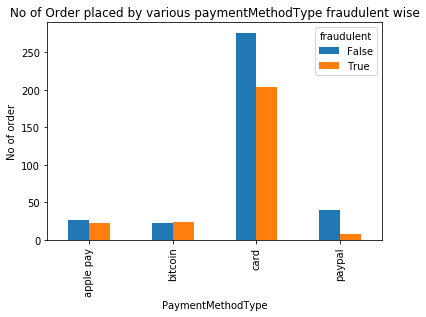

In [23]:
df_final.pivot_table(index='paymentMethodType', columns='fraudulent', values='orderId',aggfunc=len, fill_value=0).plot(kind='bar')
plt.ylabel('No of order');
plt.xlabel('PaymentMethodType')
plt.title('No of Order placed by various paymentMethodType fraudulent wise')
plt.show()

### From above graph,we can see Paypal is having less fraud customer order percentage.
### Bitcoin has equal no of fraud and no-fraud customer order.

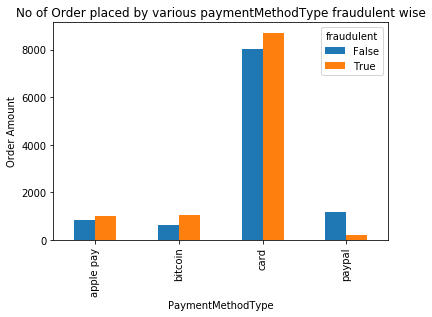

In [24]:
df_final.pivot_table(index='paymentMethodType', columns='fraudulent', values='orderAmount',aggfunc=np.sum, fill_value=0).plot(kind='bar')
plt.ylabel('Order Amount');
plt.xlabel('PaymentMethodType')
plt.title('No of Order placed by various paymentMethodType fraudulent wise')
plt.show()

#### Using Card,bitcoin and apple pay customer are making fraud transaction.Also the order amonut is high in fraud customer as compare to non-fraud.
#### Paypal is safest mode as compare to rest three.

In [25]:
##No of order group by 'fraudulent','orderState'
df_final.groupby(['fraudulent','orderState']).aggregate({'orderId':len})

orderId
fraudulent orderState         
False      failed           36
           fulfilled       298
           pending          32
True       failed           27
           fulfilled       218
           pending          12

#### No of fulfilled Fraud order is 35%.

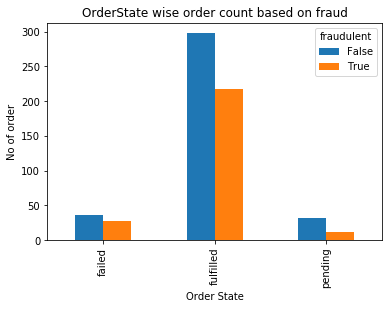

In [26]:
df_final.pivot_table(index='orderState', columns='fraudulent', values='orderId',aggfunc=len, fill_value=0).plot(kind='bar')
plt.ylabel('No of order');
plt.xlabel('Order State')
plt.title('OrderState wise order count based on fraud')
plt.show()

In [27]:
##No of Order aggregated by 'fraudulent','paymentMethodType','orderState'
df_final.groupby(['fraudulent','paymentMethodType','orderState']).aggregate({'orderId':len})

orderId
fraudulent paymentMethodType orderState         
False      apple pay         failed            2
                             fulfilled        22
                             pending           3
           bitcoin           failed            2
                             fulfilled        21
           card              failed           28
                             fulfilled       224
                             pending          24
           paypal            failed            4
                             fulfilled        31
                             pending           5
True       apple pay         failed            2
                             fulfilled        19
                             pending           1
           bitcoin           failed            4
                             fulfilled        19
                             pending           1
           card              failed           20
                             fulfilled       173
                             pending          10
           paypal            failed            1
                             fulfilled         7

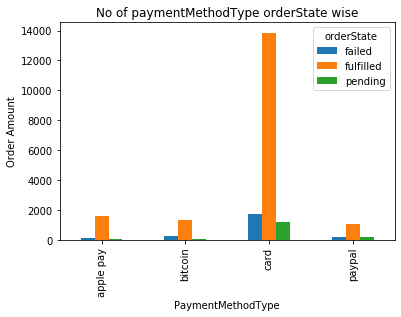

In [28]:
df_final.pivot_table(index='paymentMethodType', columns='orderState', values='orderAmount',aggfunc=np.sum, fill_value=0).plot(kind='bar')
plt.ylabel('Order Amount');
plt.xlabel('PaymentMethodType')
plt.title('No of paymentMethodType orderState wise')
plt.show()

#### Most Order is being placed by card and fullfilled by card.

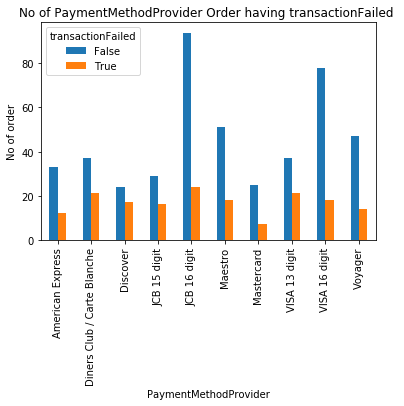

In [29]:
df_final.pivot_table(index='paymentMethodProvider', columns='transactionFailed', values='orderId',aggfunc=len, fill_value=0).plot(kind='bar')
plt.ylabel('No of order');
plt.xlabel('PaymentMethodProvider')
plt.title('No of PaymentMethodProvider Order having transactionFailed ')
plt.show()

### Transaction failure case is very less in Discover , VISA 13 digit and Diners Club / Carte Blanche.

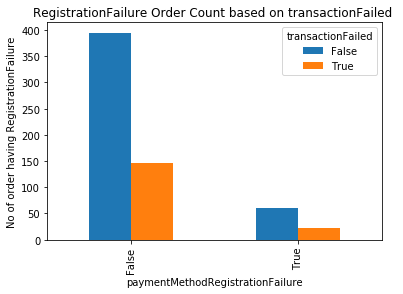

In [30]:
df_final.pivot_table(index='paymentMethodRegistrationFailure', columns='transactionFailed', values='orderId',aggfunc=len, fill_value=0).plot(kind='bar')
plt.ylabel('No of order having RegistrationFailure');
plt.xlabel('paymentMethodRegistrationFailure')
plt.title('RegistrationFailure Order Count based on transactionFailed ')
plt.show()

#### Order having Transaction Failure is because of Registration Failure.